# Análisis del Dataset de Riesgo Crediticio

Este notebook carga y analiza el dataset `credit_risk_dataset.csv`


In [1]:
## 1. Importar librerías
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [2]:
## 2. Cargar el dataset
df = pd.read_csv('credit_risk_dataset.csv')
print("✓ Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")


✓ Dataset cargado exitosamente
Dimensiones: 32581 filas x 12 columnas


In [3]:
## 3. Vista previa de los datos
# Primeras 10 filas
print("Primeras 10 filas del dataset:")
df.head(10)


Primeras 10 filas del dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
# Últimas 5 filas
print("Últimas 5 filas del dataset:")
df.tail()


Últimas 5 filas del dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
## 4. Información general del dataset
# Información del dataset
print("Información del dataset:")
print("="*50)
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Tipos de datos
print("\nTipos de datos por columna:")
print("="*50)
print(df.dtypes)



Tipos de datos por columna:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [7]:
## 5. Análisis de columnas
# Lista de columnas
print("Columnas del dataset:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Columnas del dataset:
1. person_age
2. person_income
3. person_home_ownership
4. person_emp_length
5. loan_intent
6. loan_grade
7. loan_amnt
8. loan_int_rate
9. loan_status
10. loan_percent_income
11. cb_person_default_on_file
12. cb_person_cred_hist_length


In [8]:
# Descripción de las columnas
print("\nDescripción de las columnas:")
print("="*50)
columnas_descripcion = {
    'person_age': 'Edad de la persona',
    'person_income': 'Ingreso anual de la persona',
    'person_home_ownership': 'Tipo de propiedad de vivienda',
    'person_emp_length': 'Años de empleo',
    'loan_intent': 'Propósito del préstamo',
    'loan_grade': 'Grado/calificación del préstamo',
    'loan_amnt': 'Monto del préstamo',
    'loan_int_rate': 'Tasa de interés del préstamo',
    'loan_status': 'Estado del préstamo (0=pagado, 1=impago)',
    'loan_percent_income': 'Porcentaje del préstamo respecto al ingreso',
    'cb_person_default_on_file': 'Historial de impago (Y/N)',
    'cb_person_cred_hist_length': 'Años de historial crediticio'
}

for col, desc in columnas_descripcion.items():
    print(f"{col}: {desc}")



Descripción de las columnas:
person_age: Edad de la persona
person_income: Ingreso anual de la persona
person_home_ownership: Tipo de propiedad de vivienda
person_emp_length: Años de empleo
loan_intent: Propósito del préstamo
loan_grade: Grado/calificación del préstamo
loan_amnt: Monto del préstamo
loan_int_rate: Tasa de interés del préstamo
loan_status: Estado del préstamo (0=pagado, 1=impago)
loan_percent_income: Porcentaje del préstamo respecto al ingreso
cb_person_default_on_file: Historial de impago (Y/N)
cb_person_cred_hist_length: Años de historial crediticio


In [9]:
## 6. Análisis de valores nulos
# Valores nulos
print("Valores nulos por columna:")
print("="*50)
nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

resumen_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
})

resumen_nulos = resumen_nulos[resumen_nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(resumen_nulos) > 0:
    print(resumen_nulos)
else:
    print("✓ No hay valores nulos en el dataset")


Valores nulos por columna:
                   Valores Nulos  Porcentaje (%)
loan_int_rate               3116            9.56
person_emp_length            895            2.75


In [10]:
## 7. Estadísticas descriptivas
# Estadísticas de variables numéricas
print("Estadísticas descriptivas - Variables Numéricas:")
print("="*50)
df.describe()


Estadísticas descriptivas - Variables Numéricas:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
# Estadísticas de variables categóricas
print("\nEstadísticas descriptivas - Variables Categóricas:")
print("="*50)
df.describe(include=['object'])



Estadísticas descriptivas - Variables Categóricas:


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [12]:
## 8. Análisis de valores únicos
# Valores únicos por columna
print("Valores únicos por columna:")
print("="*50)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Valores únicos por columna:
person_age: 58 valores únicos
person_income: 4295 valores únicos
person_home_ownership: 4 valores únicos
person_emp_length: 36 valores únicos
loan_intent: 6 valores únicos
loan_grade: 7 valores únicos
loan_amnt: 753 valores únicos
loan_int_rate: 348 valores únicos
loan_status: 2 valores únicos
loan_percent_income: 77 valores únicos
cb_person_default_on_file: 2 valores únicos
cb_person_cred_hist_length: 29 valores únicos


In [13]:
## 9. Distribución de variables categóricas
# Distribución de person_home_ownership
print("\nDistribución de 'person_home_ownership':")
print("="*50)
print(df['person_home_ownership'].value_counts())
print("\nPorcentaje:")
print(df['person_home_ownership'].value_counts(normalize=True) * 100)



Distribución de 'person_home_ownership':
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Porcentaje:
person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64


In [14]:
# Distribución de loan_intent
print("\nDistribución de 'loan_intent':")
print("="*50)
print(df['loan_intent'].value_counts())
print("\nPorcentaje:")
print(df['loan_intent'].value_counts(normalize=True) * 100)



Distribución de 'loan_intent':
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Porcentaje:
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: proportion, dtype: float64


In [15]:
# Distribución de loan_grade
print("\nDistribución de 'loan_grade':")
print("="*50)
print(df['loan_grade'].value_counts().sort_index())
print("\nPorcentaje:")
print(df['loan_grade'].value_counts(normalize=True).sort_index() * 100)



Distribución de 'loan_grade':
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Porcentaje:
loan_grade
A    33.077561
B    32.076977
C    19.821368
D    11.129186
E     2.958780
F     0.739695
G     0.196434
Name: proportion, dtype: float64


In [16]:
# Distribución de loan_status (variable objetivo)
print("\nDistribución de 'loan_status' (Variable Objetivo):")
print("="*50)
print(df['loan_status'].value_counts())
print("\nPorcentaje:")
status_dist = df['loan_status'].value_counts(normalize=True) * 100
print(f"Pagado (0): {status_dist[0]:.2f}%")
print(f"Impago (1): {status_dist[1]:.2f}%")



Distribución de 'loan_status' (Variable Objetivo):
loan_status
0    25473
1     7108
Name: count, dtype: int64

Porcentaje:
Pagado (0): 78.18%
Impago (1): 21.82%


In [17]:
# Distribución de cb_person_default_on_file
print("\nDistribución de 'cb_person_default_on_file':")
print("="*50)
print(df['cb_person_default_on_file'].value_counts())
print("\nPorcentaje:")
print(df['cb_person_default_on_file'].value_counts(normalize=True) * 100)



Distribución de 'cb_person_default_on_file':
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

Porcentaje:
cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64


In [18]:
## 10. Resumen ejecutivo
print("\n" + "="*60)
print("RESUMEN EJECUTIVO DEL DATASET")
print("="*60)
print(f"\n📊 Total de registros: {len(df):,}")
print(f"📋 Total de columnas: {len(df.columns)}")
print(f"\n🔢 Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"📝 Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")
print(f"\n❌ Total valores nulos: {df.isnull().sum().sum()}")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*60)



RESUMEN EJECUTIVO DEL DATASET

📊 Total de registros: 32,581
📋 Total de columnas: 12

🔢 Variables numéricas: 8
📝 Variables categóricas: 4

❌ Total valores nulos: 4011
💾 Memoria utilizada: 9.62 MB



MODELADO CON MACHINE LEARNING

In [19]:
# Modelado de Machine Learning para Predicción de Riesgo Crediticio

'''En esta sección construiremos modelos de machine learning para predecir 
el riesgo de impago (`loan_status`) basándonos en las características 
del solicitante y del préstamo.'''


## 11. Importar librerías para Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✓ Librerías importadas exitosamente")


✓ Librerías importadas exitosamente


In [20]:
## 12. Preparación de los datos para modelado

# Crear una copia del dataset para trabajar
df_modelo = df.copy()

# Separar variable objetivo
X = df_modelo.drop('loan_status', axis=1)
y = df_modelo['loan_status']

print("✓ Datos preparados")
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"\nPorcentaje:")
print(y.value_counts(normalize=True) * 100)


✓ Datos preparados
Dimensiones de X: (32581, 11)
Dimensiones de y: (32581,)

Distribución de la variable objetivo:
loan_status
0    25473
1     7108
Name: count, dtype: int64

Porcentaje:
loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [21]:
## 13. Preprocesamiento de datos

# Identificar columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

print("Columnas numéricas:", columnas_numericas)
print("\nColumnas categóricas:", columnas_categoricas)

# Manejo de valores nulos en variables numéricas
print("\n" + "="*50)
print("Manejo de valores nulos:")
print("="*50)

# Para person_emp_length: imputar con la mediana
mediana_emp_length = X['person_emp_length'].median()
X['person_emp_length'].fillna(mediana_emp_length, inplace=True)
print(f"✓ person_emp_length: {X['person_emp_length'].isnull().sum()} valores nulos restantes")

# Para loan_int_rate: imputar con la mediana
mediana_int_rate = X['loan_int_rate'].median()
X['loan_int_rate'].fillna(mediana_int_rate, inplace=True)
print(f"✓ loan_int_rate: {X['loan_int_rate'].isnull().sum()} valores nulos restantes")

# Verificar que no queden valores nulos
print(f"\n✓ Total de valores nulos restantes: {X.isnull().sum().sum()}")


Columnas numéricas: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

Columnas categóricas: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

Manejo de valores nulos:
✓ person_emp_length: 0 valores nulos restantes
✓ loan_int_rate: 0 valores nulos restantes

✓ Total de valores nulos restantes: 0


In [22]:
## 14. Encoding de variables categóricas

# Crear una copia para el encoding
X_encoded = X.copy()

# Label Encoding para variables categóricas
label_encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} categorías codificadas")
    print(f"  Categorías: {list(le.classes_)}")

print(f"\n✓ Todas las variables categóricas han sido codificadas")
print(f"Dimensiones finales: {X_encoded.shape}")


✓ person_home_ownership: 4 categorías codificadas
  Categorías: ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
✓ loan_intent: 6 categorías codificadas
  Categorías: ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
✓ loan_grade: 7 categorías codificadas
  Categorías: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
✓ cb_person_default_on_file: 2 categorías codificadas
  Categorías: ['N', 'Y']

✓ Todas las variables categóricas han sido codificadas
Dimensiones finales: (32581, 11)


In [23]:
## 15. División de datos en entrenamiento y prueba

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantener la proporción de clases
)

print("✓ División de datos completada")
print(f"\nConjunto de entrenamiento:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  Distribución: {y_train.value_counts().to_dict()}")

print(f"\nConjunto de prueba:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  Distribución: {y_test.value_counts().to_dict()}")


✓ División de datos completada

Conjunto de entrenamiento:
  X_train: (26064, 11)
  y_train: (26064,)
  Distribución: {0: 20378, 1: 5686}

Conjunto de prueba:
  X_test: (6517, 11)
  y_test: (6517,)
  Distribución: {0: 5095, 1: 1422}


In [24]:
## 16. Estandarización de características

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar escalado solo a variables numéricas
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

print("✓ Estandarización completada")
print("Las variables numéricas han sido escaladas (media=0, std=1)")


✓ Estandarización completada
Las variables numéricas han sido escaladas (media=0, std=1)


In [25]:
## 17. Entrenamiento de modelos

# Diccionario para almacenar los modelos y sus resultados
modelos = {}
resultados = {}

print("="*60)
print("ENTRENAMIENTO DE MODELOS")
print("="*60)

# 1. Regresión Logística
print("\n1. Entrenando Regresión Logística...")
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
modelos['Regresión Logística'] = lr
print("   ✓ Completado")

# 2. Random Forest
print("\n2. Entrenando Random Forest...")
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)
modelos['Random Forest'] = rf
print("   ✓ Completado")

# 3. Gradient Boosting
print("\n3. Entrenando Gradient Boosting...")
gb = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42,
    learning_rate=0.1
)
gb.fit(X_train, y_train)
modelos['Gradient Boosting'] = gb
print("   ✓ Completado")

print("\n" + "="*60)
print("✓ Todos los modelos han sido entrenados")
print("="*60)


ENTRENAMIENTO DE MODELOS

1. Entrenando Regresión Logística...
   ✓ Completado

2. Entrenando Random Forest...
   ✓ Completado

3. Entrenando Gradient Boosting...
   ✓ Completado

✓ Todos los modelos han sido entrenados


In [26]:
## 18. Evaluación de modelos

def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo, usar_scaled=False):
    """
    Evalúa un modelo y retorna métricas de rendimiento
    
    Nota: X_train y X_test ya deben venir preprocesados (escalados o no según usar_scaled)
    """
    # Predicciones
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    y_test_proba = modelo.predict_proba(X_test)[:, 1]
    
    # Métricas
    metricas = {
        'Accuracy (Train)': accuracy_score(y_train, y_train_pred),
        'Accuracy (Test)': accuracy_score(y_test, y_test_pred),
        'Precision (Test)': precision_score(y_test, y_test_pred),
        'Recall (Test)': recall_score(y_test, y_test_pred),
        'F1-Score (Test)': f1_score(y_test, y_test_pred),
        'ROC-AUC (Test)': roc_auc_score(y_test, y_test_proba)
    }
    
    return metricas, y_test_pred, y_test_proba

# Evaluar todos los modelos
print("="*60)
print("EVALUACIÓN DE MODELOS")
print("="*60)

for nombre, modelo in modelos.items():
    print(f"\n{nombre}:")
    print("-" * 60)
    
    # Determinar si usar datos escalados
    usar_scaled = nombre == 'Regresión Logística'
    
    if usar_scaled:
        metricas, y_pred, y_proba = evaluar_modelo(
            modelo, X_train_scaled, X_test_scaled, y_train, y_test, nombre, usar_scaled=True
        )
    else:
        metricas, y_pred, y_proba = evaluar_modelo(
            modelo, X_train, X_test, y_train, y_test, nombre, usar_scaled=False
        )
    
    resultados[nombre] = {
        'metricas': metricas,
        'y_pred': y_pred,
        'y_proba': y_proba
    }
    
    # Mostrar métricas
    for metrica, valor in metricas.items():
        print(f"  {metrica}: {valor:.4f}")

# Crear DataFrame comparativo
df_comparacion = pd.DataFrame({
    nombre: resultados[nombre]['metricas'] 
    for nombre in modelos.keys()
}).T

print("\n" + "="*60)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*60)
print(df_comparacion.round(4))


EVALUACIÓN DE MODELOS

Regresión Logística:
------------------------------------------------------------
  Accuracy (Train): 0.7803
  Accuracy (Test): 0.7836
  Precision (Test): 0.5028
  Recall (Test): 0.7707
  F1-Score (Test): 0.6086
  ROC-AUC (Test): 0.8530

Random Forest:
------------------------------------------------------------
  Accuracy (Train): 1.0000
  Accuracy (Test): 0.9308
  Precision (Test): 0.9727
  Recall (Test): 0.7025
  F1-Score (Test): 0.8158
  ROC-AUC (Test): 0.9284

Gradient Boosting:
------------------------------------------------------------
  Accuracy (Train): 0.9245
  Accuracy (Test): 0.9222
  Precision (Test): 0.9412
  Recall (Test): 0.6864
  F1-Score (Test): 0.7938
  ROC-AUC (Test): 0.9254

RESUMEN COMPARATIVO DE MODELOS
                     Accuracy (Train)  Accuracy (Test)  Precision (Test)  \
Regresión Logística            0.7803           0.7836            0.5028   
Random Forest                  1.0000           0.9308            0.9727   
Gradient Boo

**NOTA:** Si la celda 28 anterior da error, usa esta celda 28b corregida en su lugar.


In [39]:
## 28b. Verificación del modelo guardado (VERSIÓN CORREGIDA)

# Cargar el modelo para verificar que se guardó correctamente
modelo_cargado = joblib.load(ruta_modelo)

print("="*70)
print("VERIFICACIÓN DEL MODELO GUARDADO (CORREGIDO)")
print("="*70)

print(f"\n✓ Modelo cargado exitosamente")
print(f"  • Nombre: {modelo_cargado['nombre_modelo']}")
print(f"  • Versión: {modelo_cargado['version']}")
print(f"  • Fecha de entrenamiento: {modelo_cargado['fecha_entrenamiento']}")
print(f"  • Requiere escalado: {modelo_cargado['requiere_escalado']}")

print(f"\n✓ Componentes incluidos:")
print(f"  • Modelo: ✓")
print(f"  • Scaler: {'✓' if modelo_cargado['scaler'] is not None else '✗ (No requerido)'}")
print(f"  • Label Encoders: ✓ ({len(modelo_cargado['label_encoders'])} encoders)")
print(f"  • Valores de imputación: ✓")

print(f"\n✓ Métricas del modelo:")
for metrica, valor in modelo_cargado['metricas'].items():
    print(f"  • {metrica}: {valor:.4f}")

# Hacer una predicción de prueba para verificar que funciona
print(f"\n{'='*70}")
print("PRUEBA DE PREDICCIÓN CON MODELO CARGADO")
print(f"{'='*70}")

# CORRECCIÓN: Obtener el índice del ejemplo de prueba
indice_ejemplo = X_test.index[0]

# CORRECCIÓN: Usar los datos originales (antes del encoding) del dataframe original
# Esto simula un caso real donde los datos vienen sin codificar
ejemplo_prueba = X.iloc[[indice_ejemplo]].copy()
valor_real = y.iloc[indice_ejemplo]

# Preprocesar el ejemplo (simulando el proceso de producción)
ejemplo_procesado = ejemplo_prueba.copy()

# Imputar valores nulos si es necesario
if ejemplo_procesado['person_emp_length'].isnull().any():
    ejemplo_procesado['person_emp_length'].fillna(modelo_cargado['mediana_emp_length'], inplace=True)
if ejemplo_procesado['loan_int_rate'].isnull().any():
    ejemplo_procesado['loan_int_rate'].fillna(modelo_cargado['mediana_int_rate'], inplace=True)

# CORRECCIÓN: Encoding de variables categóricas con manejo de valores nuevos
for col, le in modelo_cargado['label_encoders'].items():
    if col in ejemplo_procesado.columns:
        # Manejar valores nuevos no vistos en entrenamiento
        ejemplo_procesado[col] = ejemplo_procesado[col].astype(str)
        ejemplo_procesado[col] = ejemplo_procesado[col].map(
            lambda x: x if x in le.classes_ else le.classes_[0]
        )
        ejemplo_procesado[col] = le.transform(ejemplo_procesado[col])

# Escalar si es necesario
if modelo_cargado['requiere_escalado']:
    ejemplo_procesado[modelo_cargado['columnas_numericas']] = modelo_cargado['scaler'].transform(
        ejemplo_procesado[modelo_cargado['columnas_numericas']]
    )

# Hacer predicción
prediccion = modelo_cargado['modelo'].predict(ejemplo_procesado)[0]
probabilidad = modelo_cargado['modelo'].predict_proba(ejemplo_procesado)[0, 1]

print(f"\nEjemplo de prueba:")
print(f"  • Valor real: {valor_real} ({'Impago' if valor_real == 1 else 'Pagado'})")
print(f"  • Predicción: {prediccion} ({'Impago' if prediccion == 1 else 'Pagado'})")
print(f"  • Probabilidad de impago: {probabilidad:.4f}")
print(f"  • Resultado: {'✓ Correcto' if prediccion == valor_real else '✗ Incorrecto'}")

print(f"\n{'='*70}")
print("✓ Modelo verificado y listo para producción")
print(f"{'='*70}")


VERIFICACIÓN DEL MODELO GUARDADO (CORREGIDO)

✓ Modelo cargado exitosamente
  • Nombre: Random Forest
  • Versión: 1.0
  • Fecha de entrenamiento: 2025-11-27 19:18:28
  • Requiere escalado: False

✓ Componentes incluidos:
  • Modelo: ✓
  • Scaler: ✗ (No requerido)
  • Label Encoders: ✓ (4 encoders)
  • Valores de imputación: ✓

✓ Métricas del modelo:
  • Accuracy (Train): 1.0000
  • Accuracy (Test): 0.9308
  • Precision (Test): 0.9727
  • Recall (Test): 0.7025
  • F1-Score (Test): 0.8158
  • ROC-AUC (Test): 0.9284

PRUEBA DE PREDICCIÓN CON MODELO CARGADO

Ejemplo de prueba:
  • Valor real: 0 (Pagado)
  • Predicción: 0 (Pagado)
  • Probabilidad de impago: 0.0700
  • Resultado: ✓ Correcto

✓ Modelo verificado y listo para producción


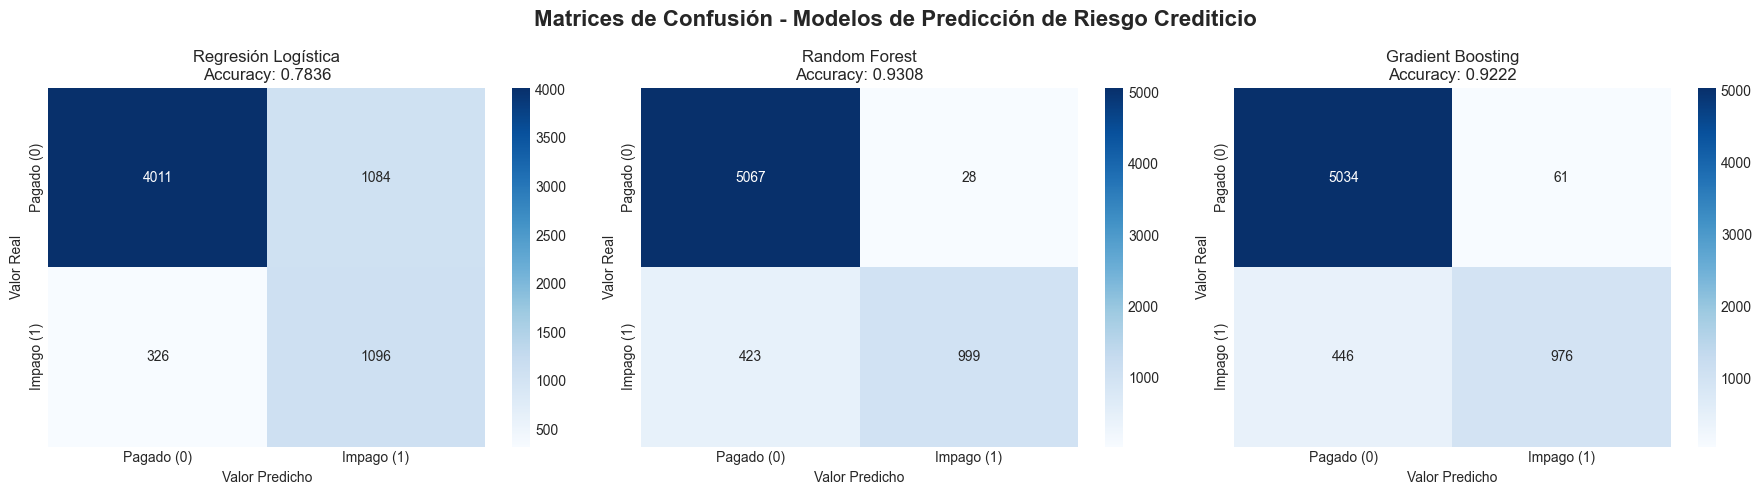


REPORTE DE CLASIFICACIÓN - Random Forest
              precision    recall  f1-score   support

  Pagado (0)       0.92      0.99      0.96      5095
  Impago (1)       0.97      0.70      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [40]:
## 19. Matrices de confusión

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrices de Confusión - Modelos de Predicción de Riesgo Crediticio', 
             fontsize=16, fontweight='bold')

for idx, (nombre, modelo) in enumerate(modelos.items()):
    y_pred = resultados[nombre]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Pagado (0)', 'Impago (1)'],
                yticklabels=['Pagado (0)', 'Impago (1)'])
    axes[idx].set_title(f'{nombre}\nAccuracy: {resultados[nombre]["metricas"]["Accuracy (Test)"]:.4f}')
    axes[idx].set_ylabel('Valor Real')
    axes[idx].set_xlabel('Valor Predicho')

plt.tight_layout()
plt.show()

# Mostrar reporte de clasificación del mejor modelo
mejor_modelo_nombre = df_comparacion['F1-Score (Test)'].idxmax()
print(f"\n{'='*60}")
print(f"REPORTE DE CLASIFICACIÓN - {mejor_modelo_nombre}")
print(f"{'='*60}")
print(classification_report(y_test, resultados[mejor_modelo_nombre]['y_pred'],
                          target_names=['Pagado (0)', 'Impago (1)']))


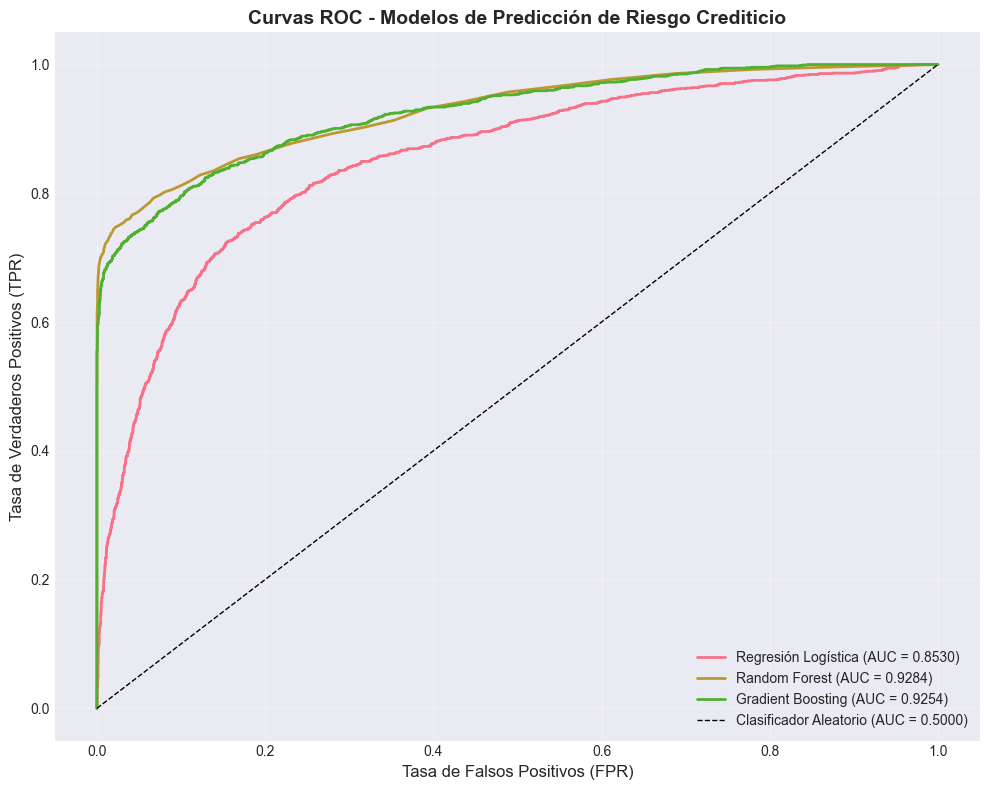

In [41]:
## 20. Curvas ROC

fig, ax = plt.subplots(figsize=(10, 8))

for nombre in modelos.keys():
    y_proba = resultados[nombre]['y_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = resultados[nombre]['metricas']['ROC-AUC (Test)']
    
    ax.plot(fpr, tpr, label=f'{nombre} (AUC = {auc_score:.4f})', linewidth=2)

# Línea de referencia (clasificador aleatorio)
ax.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio (AUC = 0.5000)', linewidth=1)

ax.set_xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
ax.set_ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
ax.set_title('Curvas ROC - Modelos de Predicción de Riesgo Crediticio', 
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


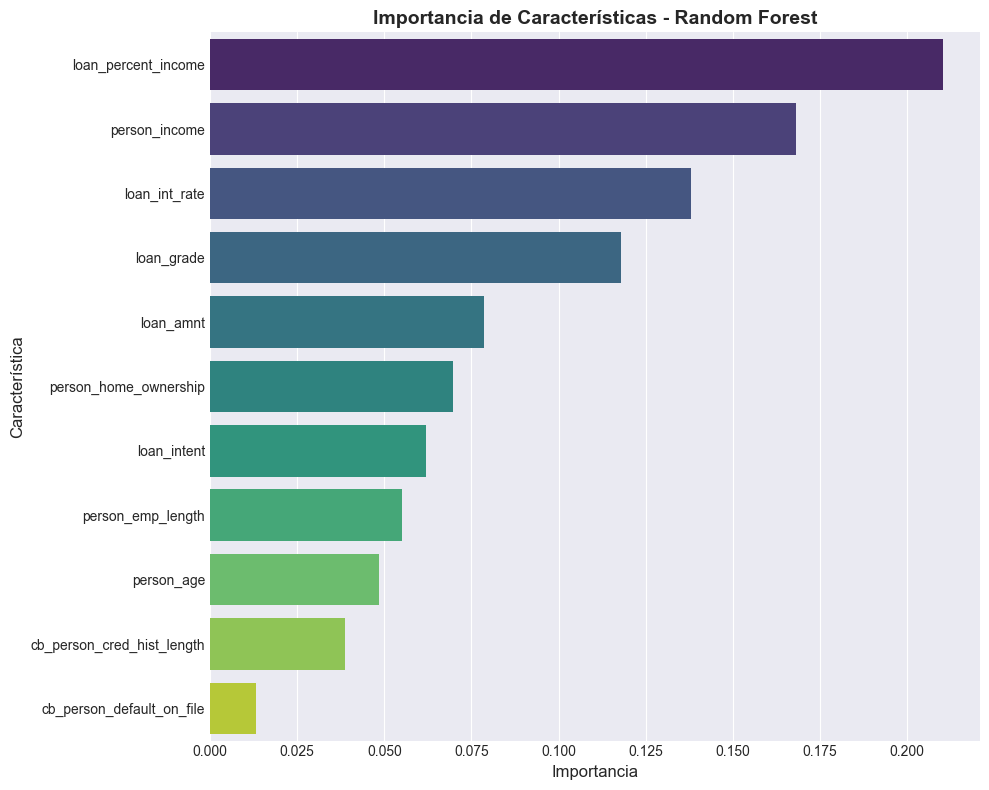


Importancia de características (Random Forest):
            Característica  Importancia
       loan_percent_income     0.210375
             person_income     0.168020
             loan_int_rate     0.137912
                loan_grade     0.117992
                 loan_amnt     0.078564
     person_home_ownership     0.069787
               loan_intent     0.061843
         person_emp_length     0.055049
                person_age     0.048360
cb_person_cred_hist_length     0.038800
 cb_person_default_on_file     0.013299


In [42]:
## 21. Importancia de características (Random Forest)

# Obtener importancia de características del Random Forest
importancia_rf = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

# Visualizar importancia
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=importancia_rf, y='Característica', x='Importancia', palette='viridis', ax=ax)
ax.set_title('Importancia de Características - Random Forest', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importancia', fontsize=12)
ax.set_ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show()

print("\nImportancia de características (Random Forest):")
print("="*60)
print(importancia_rf.to_string(index=False))


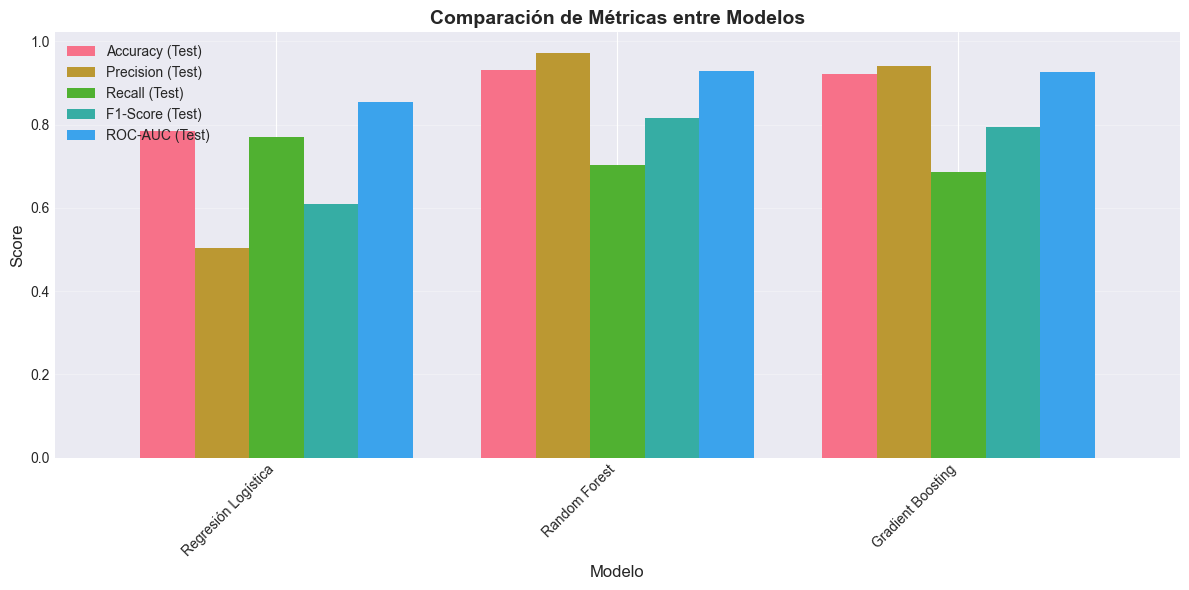

In [43]:
## 22. Comparación visual de métricas

# Preparar datos para visualización
metricas_comparacion = df_comparacion[['Accuracy (Test)', 'Precision (Test)', 
                                       'Recall (Test)', 'F1-Score (Test)', 'ROC-AUC (Test)']]

fig, ax = plt.subplots(figsize=(12, 6))
metricas_comparacion.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Comparación de Métricas entre Modelos', fontsize=14, fontweight='bold')
ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(metricas_comparacion.index, rotation=45, ha='right')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [44]:
## 23. Selección del mejor modelo

# Seleccionar el mejor modelo basado en F1-Score (balance entre precision y recall)
mejor_modelo_nombre = df_comparacion['F1-Score (Test)'].idxmax()
mejor_modelo = modelos[mejor_modelo_nombre]

print("="*60)
print("MEJOR MODELO SELECCIONADO")
print("="*60)
print(f"\nModelo: {mejor_modelo_nombre}")
print(f"\nMétricas de rendimiento:")
for metrica, valor in resultados[mejor_modelo_nombre]['metricas'].items():
    print(f"  {metrica}: {valor:.4f}")

print(f"\n{'='*60}")
print("INTERPRETACIÓN:")
print(f"{'='*60}")
print(f"""
El modelo {mejor_modelo_nombre} ha sido seleccionado como el mejor modelo
basado en el F1-Score, que balancea la precisión y el recall.

Métricas clave:
- Accuracy: Porcentaje de predicciones correctas
- Precision: De los préstamos predichos como impago, cuántos realmente fueron impago
- Recall: De los préstamos que realmente fueron impago, cuántos fueron detectados
- F1-Score: Media armónica entre Precision y Recall
- ROC-AUC: Capacidad del modelo para distinguir entre clases

Para el negocio de crédito, es importante:
- Maximizar el Recall para detectar la mayor cantidad de impagos posibles
- Mantener una buena Precision para no rechazar demasiados préstamos buenos
""")


MEJOR MODELO SELECCIONADO

Modelo: Random Forest

Métricas de rendimiento:
  Accuracy (Train): 1.0000
  Accuracy (Test): 0.9308
  Precision (Test): 0.9727
  Recall (Test): 0.7025
  F1-Score (Test): 0.8158
  ROC-AUC (Test): 0.9284

INTERPRETACIÓN:

El modelo Random Forest ha sido seleccionado como el mejor modelo
basado en el F1-Score, que balancea la precisión y el recall.

Métricas clave:
- Accuracy: Porcentaje de predicciones correctas
- Precision: De los préstamos predichos como impago, cuántos realmente fueron impago
- Recall: De los préstamos que realmente fueron impago, cuántos fueron detectados
- F1-Score: Media armónica entre Precision y Recall
- ROC-AUC: Capacidad del modelo para distinguir entre clases

Para el negocio de crédito, es importante:
- Maximizar el Recall para detectar la mayor cantidad de impagos posibles
- Mantener una buena Precision para no rechazar demasiados préstamos buenos



In [51]:
## 25. Guardar el mejor modelo

import joblib
from datetime import datetime
import os

# Crear directorio para modelos si no existe
directorio_modelos = 'modelos'
if not os.path.exists(directorio_modelos):
    os.makedirs(directorio_modelos)
    print(f"✓ Directorio '{directorio_modelos}' creado")

# Preparar el paquete completo del modelo para guardar
paquete_modelo = {
    'modelo': mejor_modelo,
    'nombre_modelo': mejor_modelo_nombre,
    'version': '1.0',
    'fecha_entrenamiento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metricas': resultados[mejor_modelo_nombre]['metricas'],
    'label_encoders': label_encoders,
    'columnas_numericas': columnas_numericas,
    'columnas_categoricas': columnas_categoricas,
    'mediana_emp_length': mediana_emp_length,
    'mediana_int_rate': mediana_int_rate,
    'requiere_escalado': mejor_modelo_nombre == 'Regresión Logística',
    'scaler': scaler if mejor_modelo_nombre == 'Regresión Logística' else None
}

# Nombre del archivo del modelo
nombre_archivo = f'modelo_riesgo_credito_{mejor_modelo_nombre.lower().replace(" ", "_")}.pkl'
ruta_modelo = os.path.join(directorio_modelos, nombre_archivo)

# Guardar el modelo
joblib.dump(paquete_modelo, ruta_modelo)

print("="*70)
print("MODELO GUARDADO EXITOSAMENTE")
print("="*70)
print(f"\n✓ Modelo guardado en: {ruta_modelo}")
print(f"\n📦 Componentes guardados:")
print(f"  • Modelo: {mejor_modelo_nombre}")
print(f"  • Métricas de rendimiento")
print(f"  • Label Encoders ({len(label_encoders)} encoders)")
print(f"  • Columnas numéricas y categóricas")
print(f"  • Valores de imputación (medianas)")
print(f"  • Scaler: {'Sí' if paquete_modelo['requiere_escalado'] else 'No requerido'}")

print(f"\n📊 Métricas del modelo guardado:")
for metrica, valor in paquete_modelo['metricas'].items():
    print(f"  • {metrica}: {valor:.4f}")

print(f"\n💡 Para cargar el modelo en el futuro, usa:")
print(f"   import joblib")
print(f"   modelo_cargado = joblib.load('{ruta_modelo}')")
print("="*70)


✓ Directorio 'modelos' creado
MODELO GUARDADO EXITOSAMENTE

✓ Modelo guardado en: modelos\modelo_riesgo_credito_random_forest.pkl

📦 Componentes guardados:
  • Modelo: Random Forest
  • Métricas de rendimiento
  • Label Encoders (4 encoders)
  • Columnas numéricas y categóricas
  • Valores de imputación (medianas)
  • Scaler: No requerido

📊 Métricas del modelo guardado:
  • Accuracy (Train): 1.0000
  • Accuracy (Test): 0.9308
  • Precision (Test): 0.9727
  • Recall (Test): 0.7025
  • F1-Score (Test): 0.8158
  • ROC-AUC (Test): 0.9284

💡 Para cargar el modelo en el futuro, usa:
   import joblib
   modelo_cargado = joblib.load('modelos\modelo_riesgo_credito_random_forest.pkl')


In [52]:
## 24. Función para hacer predicciones en nuevos datos

def predecir_riesgo_credito(datos_nuevos, modelo, scaler, label_encoders, usar_scaled=True):
    """
    Función para predecir el riesgo crediticio en nuevos datos
    
    Parámetros:
    -----------
    datos_nuevos : DataFrame
        DataFrame con las mismas columnas que X (sin loan_status)
    modelo : modelo entrenado
        Modelo de machine learning entrenado
    scaler : StandardScaler
        Scaler ajustado a los datos de entrenamiento
    label_encoders : dict
        Diccionario con los label encoders para cada variable categórica
    usar_scaled : bool
        Si True, aplica escalado a las variables numéricas
    
    Retorna:
    --------
    DataFrame con las predicciones y probabilidades
    """
    # Crear copia para no modificar el original
    datos = datos_nuevos.copy()
    
    # Manejar valores nulos
    if 'person_emp_length' in datos.columns:
        datos['person_emp_length'].fillna(mediana_emp_length, inplace=True)
    if 'loan_int_rate' in datos.columns:
        datos['loan_int_rate'].fillna(mediana_int_rate, inplace=True)
    
    # Encoding de variables categóricas
    for col, le in label_encoders.items():
        if col in datos.columns:
            # Manejar valores nuevos no vistos en entrenamiento
            datos[col] = datos[col].astype(str)
            datos[col] = datos[col].map(lambda x: x if x in le.classes_ else le.classes_[0])
            datos[col] = le.transform(datos[col])
    
    # Estandarizar si es necesario
    if usar_scaled:
        datos_scaled = datos.copy()
        datos_scaled[columnas_numericas] = scaler.transform(datos[columnas_numericas])
        datos_final = datos_scaled
    else:
        datos_final = datos
    
    # Hacer predicciones
    predicciones = modelo.predict(datos_final)
    probabilidades = modelo.predict_proba(datos_final)[:, 1]
    
    # Crear DataFrame con resultados
    resultados_df = pd.DataFrame({
        'Predicción': predicciones,
        'Probabilidad_Impago': probabilidades,
        'Riesgo': ['Alto' if p == 1 else 'Bajo' for p in predicciones]
    })
    
    return resultados_df

print("✓ Función de predicción creada exitosamente")
print("\nEjemplo de uso:")
print("="*60)
print("""
# Ejemplo de datos nuevos
nuevos_datos = pd.DataFrame({
    'person_age': [25],
    'person_income': [50000],
    'person_home_ownership': ['RENT'],
    'person_emp_length': [3.0],
    'loan_intent': ['EDUCATION'],
    'loan_grade': ['B'],
    'loan_amnt': [10000],
    'loan_int_rate': [10.5],
    'loan_percent_income': [0.20],
    'cb_person_default_on_file': ['N'],
    'cb_person_cred_hist_length': [5]
})

# Hacer predicción
resultado = predecir_riesgo_credito(
    nuevos_datos, 
    mejor_modelo, 
    scaler, 
    label_encoders,
    usar_scaled=(mejor_modelo_nombre == 'Regresión Logística')
)
print(resultado)
""")


✓ Función de predicción creada exitosamente

Ejemplo de uso:

# Ejemplo de datos nuevos
nuevos_datos = pd.DataFrame({
    'person_age': [25],
    'person_income': [50000],
    'person_home_ownership': ['RENT'],
    'person_emp_length': [3.0],
    'loan_intent': ['EDUCATION'],
    'loan_grade': ['B'],
    'loan_amnt': [10000],
    'loan_int_rate': [10.5],
    'loan_percent_income': [0.20],
    'cb_person_default_on_file': ['N'],
    'cb_person_cred_hist_length': [5]
})

# Hacer predicción
resultado = predecir_riesgo_credito(
    nuevos_datos, 
    mejor_modelo, 
    scaler, 
    label_encoders,
    usar_scaled=(mejor_modelo_nombre == 'Regresión Logística')
)
print(resultado)



In [53]:
## 25. Ejemplo de predicción con datos de prueba

# Seleccionar algunos ejemplos del conjunto de prueba
ejemplos_indices = [0, 10, 50, 100, 200]
ejemplos_datos = X_test.iloc[ejemplos_indices].copy()
ejemplos_reales = y_test.iloc[ejemplos_indices].values

print("="*60)
print("EJEMPLOS DE PREDICCIÓN")
print("="*60)

# Determinar si usar escalado
usar_scaled = mejor_modelo_nombre == 'Regresión Logística'

# Hacer predicciones
predicciones_ejemplo = predecir_riesgo_credito(
    ejemplos_datos,
    mejor_modelo,
    scaler,
    label_encoders,
    usar_scaled=usar_scaled
)

# Agregar valores reales para comparación
predicciones_ejemplo['Valor_Real'] = ejemplos_reales
predicciones_ejemplo['Correcto'] = (predicciones_ejemplo['Predicción'] == predicciones_ejemplo['Valor_Real'])

print("\nResultados:")
print(predicciones_ejemplo.to_string(index=False))

print(f"\n✓ Precisión en estos ejemplos: {predicciones_ejemplo['Correcto'].mean()*100:.1f}%")


EJEMPLOS DE PREDICCIÓN

Resultados:
 Predicción  Probabilidad_Impago Riesgo  Valor_Real  Correcto
          0                 0.16   Bajo           0      True
          0                 0.01   Bajo           0      True
          0                 0.10   Bajo           1     False
          0                 0.01   Bajo           0      True
          0                 0.12   Bajo           0      True

✓ Precisión en estos ejemplos: 80.0%


In [54]:
## 26. Resumen final del modelado

print("="*70)
print("RESUMEN FINAL DEL MODELADO DE RIESGO CREDITICIO")
print("="*70)

print(f"\n📊 DATOS:")
print(f"  • Total de registros: {len(df):,}")
print(f"  • Registros de entrenamiento: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"  • Registros de prueba: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\n🎯 VARIABLE OBJETIVO:")
print(f"  • Clase 0 (Pagado): {y.value_counts()[0]:,} ({y.value_counts(normalize=True)[0]*100:.2f}%)")
print(f"  • Clase 1 (Impago): {y.value_counts()[1]:,} ({y.value_counts(normalize=True)[1]*100:.2f}%)")

print(f"\n🤖 MODELOS ENTRENADOS:")
for nombre in modelos.keys():
    print(f"  • {nombre}")

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_nombre}")
mejores_metricas = resultados[mejor_modelo_nombre]['metricas']
print(f"  • Accuracy: {mejores_metricas['Accuracy (Test)']:.4f}")
print(f"  • Precision: {mejores_metricas['Precision (Test)']:.4f}")
print(f"  • Recall: {mejores_metricas['Recall (Test)']:.4f}")
print(f"  • F1-Score: {mejores_metricas['F1-Score (Test)']:.4f}")
print(f"  • ROC-AUC: {mejores_metricas['ROC-AUC (Test)']:.4f}")

print(f"\n💡 INTERPRETACIÓN:")
print(f"  • El modelo puede predecir correctamente el {mejores_metricas['Accuracy (Test)']*100:.2f}% de los casos")
print(f"  • De los préstamos predichos como impago, el {mejores_metricas['Precision (Test)']*100:.2f}% realmente fueron impago")
print(f"  • El modelo detecta el {mejores_metricas['Recall (Test)']*100:.2f}% de los impagos reales")

print(f"\n{'='*70}")
print("✓ Análisis y modelado completados exitosamente")
print("="*70)


RESUMEN FINAL DEL MODELADO DE RIESGO CREDITICIO

📊 DATOS:
  • Total de registros: 32,581
  • Registros de entrenamiento: 26,064 (80.0%)
  • Registros de prueba: 6,517 (20.0%)

🎯 VARIABLE OBJETIVO:
  • Clase 0 (Pagado): 25,473 (78.18%)
  • Clase 1 (Impago): 7,108 (21.82%)

🤖 MODELOS ENTRENADOS:
  • Regresión Logística
  • Random Forest
  • Gradient Boosting

🏆 MEJOR MODELO: Random Forest
  • Accuracy: 0.9308
  • Precision: 0.9727
  • Recall: 0.7025
  • F1-Score: 0.8158
  • ROC-AUC: 0.9284

💡 INTERPRETACIÓN:
  • El modelo puede predecir correctamente el 93.08% de los casos
  • De los préstamos predichos como impago, el 97.27% realmente fueron impago
  • El modelo detecta el 70.25% de los impagos reales

✓ Análisis y modelado completados exitosamente
